# Testing the Stationarity of a Signal

In [2]:
import SignalSnap as snp
import numpy as np

In [3]:
# ------- creat complex noise --------
t_array = np.arange(0, 1e6, 1) # in s
dt = t_array[1] - t_array[0]
f_max = 1 / dt / 2
print('f_Nyquist =', f_max, 'Hz')

white_noise_real = np.random.normal(size=len(t_array))
white_noise_imag = 1j * np.random.normal(size=len(t_array))

noise = white_noise_real + white_noise_imag

# ------- filter noise ---------
def dydt(y, t, omega_0, gamma, noise):
    return + 1j * omega_0[int(t)] * y - gamma * y + noise[int(t)] / 10

y0 = 0
omega_0 = 2 * np.pi * np.linspace(0.001, 0.004, len(t_array))
gamma = 0.001

# ------- integrate with euler method --------
y = 1j * np.empty_like(t_array)
y[0] = y0
for i in range(1, len(t_array)):
    y[i] = y[i-1] + dt * dydt(y[i-1], t_array[i-1], omega_0, gamma, noise)

f_Nyquist = 0.5 Hz


In [4]:
spec = snp.Spectrum(data=np.real(y), delta_t=dt, f_unit='Hz')

In [11]:
T_window = 0.5e4 # these are now ms since the unit of choice are kHz
f_max = 0.01 # kHz
f, s, serr = spec.calc_spec(order_in=[2,3,4], T_window=T_window, f_max=f_max, backend='cpu', m_stationarity=2)

Actual T_window: 5000.0
Maximum frequency: 0.5
Number of points: 51


chunk shape:  5000


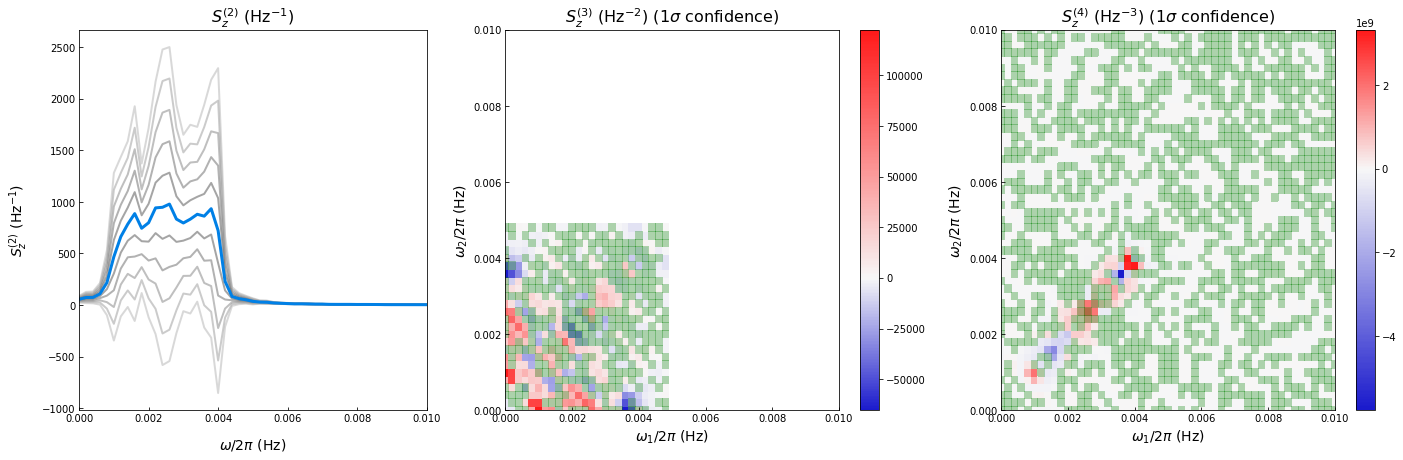

In [12]:
fig = spec.plot()

One spectrum calculated from a 100000.0 s measurement


/Users/markus/opt/anaconda3/lib/python3.7/site-packages/SignalSnap/analysis.py:853: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(x, y, s2_array, cmap='rainbow', vmin=vmin, vmax=vmax)  # norm=norm)


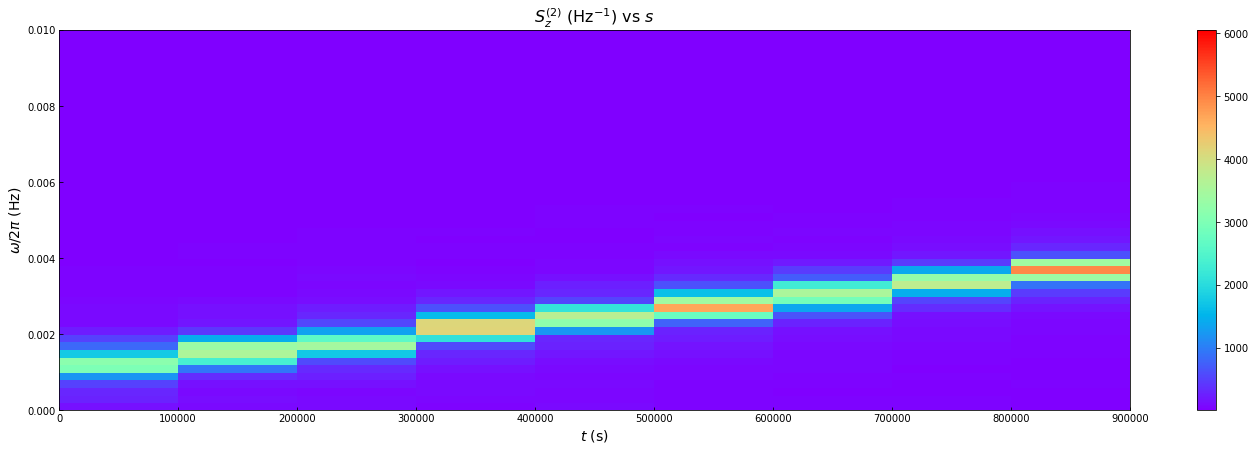

In [13]:
fig = spec.stationarity_plot()

In [51]:
spec.S_stationarity[2]

[array([ 664.04759916+0.j, 1418.11850542+0.j,  749.4840214 +0.j,
          78.89266149+0.j,   22.28088072+0.j,   13.0296264 +0.j,
           8.26163112+0.j,    4.70717386+0.j,    3.91581264+0.j,
           2.82046948+0.j,    2.13434304+0.j]),
 array([ 253.79693322+0.j, 1320.95362134+0.j, 1251.17020151+0.j,
         135.90944062+0.j,   29.14970312+0.j,   16.59789956+0.j,
           9.98353482+0.j,    5.83036155+0.j,    4.58221074+0.j,
           4.29086651+0.j,    3.27396537+0.j]),
 array([ 173.89520326+0.j,  730.11750619+0.j, 1207.70673557+0.j,
         249.9375779 +0.j,   39.47268297+0.j,   15.87205309+0.j,
           9.54124931+0.j,    6.3701525 +0.j,    5.33885808+0.j,
           3.74573997+0.j,    3.02741243+0.j]),
 array([  67.15309332+0.j,  385.52352438+0.j, 1213.06658248+0.j,
         485.81593342+0.j,   60.34881554+0.j,   21.31122449+0.j,
          10.90111662+0.j,    7.21520876+0.j,    4.79145579+0.j,
           3.75310946+0.j,    3.30996143+0.j]),
 array([  65.08772913+0.j,  